In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("/content/Jingsong Zhang_open_payment - Jingsong Zhang_Associated_data.csv")

In [5]:
df

,change_type,covered_recipient_type,noncovered_recipient_entity_name,teaching_hospital_ccn,teaching_hospital_id,teaching_hospital_name,covered_recipient_profile_id,covered_recipient_npi,covered_recipient_first_name,covered_recipient_middle_name,...,preclinical_research_indicator,delay_in_publication_indicator,name_of_study,dispute_status_for_publication,record_id,program_year,payment_publication_date,clinicaltrials_gov_identifier,research_information_link,context_of_research
0,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100271.0,4363.0,H. LEE MOFFITT CANCER CENTER,NaN,NaN,NaN,NaN,...,No,No,Phase III Adjuvant Bladder,No,401907604,2016,01/18/2024,NaN,NaN,NaN
1,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100271.0,4363.0,H. Lee Moffitt Cancer Center,NaN,NaN,NaN,NaN,...,No,No,"""A Phase III, Randomized, Open-label, Controll...",No,362267848,2016,01/18/2024,NaN,NaN,NaN
2,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100271.0,4363.0,H. Lee Moffitt Cancer Center,NaN,NaN,NaN,NaN,...,No,No,"""A Phase III, Randomized, Open-label, Controll...",No,362271688,2016,01/18/2024,NaN,NaN,NaN
3,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100271.0,4363.0,H. LEE MOFFITT CANCER CENTER,NaN,NaN,NaN,NaN,...,No,No,Phase III Adjuvant Bladder,No,401875474,2016,01/18/2024,NaN,NaN,NaN
4,UNCHANGED,Covered Recipient Teaching Hospital,NaN,100271.0,4363.0,H. LEE MOFFITT CANCER CENTER,NaN,NaN,NaN,NaN,...,No,No,Investigator Fees or Payments,No,390553382,2016,01/18/2024,NaN,NaN,FADb 135077614 135077614 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632,UNCHANGED,Non-covered Recipient Entity,Advarra Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,Study of Cabozantinib in Combination With Atez...,No,943766891,2022,01/18/2024,NCT03170960,NaN,NaN
633,UNCHANGED,Non-covered Recipient Entity,H Lee Moffitt Cancer Center And Research Insti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,"BAY 1841788, mHSPC",No,932270189,2022,01/18/2024,NaN,NaN,NaN
634,UNCHANGED,Non-covered Recipient Entity,H Lee Moffitt Cancer Center And Research Insti...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,"BAY 1841788, mHSPC",No,932270191,2022,01/18/2024,NaN,NaN,NaN
635,UNCHANGED,Non-covered Recipient Entity,H LEE MOFFITT CANCER CNTR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,No,No,A Phase 1 Study of the Safety and Pharmacokine...,No,935431083,2022,01/18/2024,NaN,NaN,NaN


In [6]:
df.shape

(637, 252)

In [7]:
df.info

<bound method DataFrame.info of     change_type               covered_recipient_type  \
0     UNCHANGED  Covered Recipient Teaching Hospital   
1     UNCHANGED  Covered Recipient Teaching Hospital   
2     UNCHANGED  Covered Recipient Teaching Hospital   
3     UNCHANGED  Covered Recipient Teaching Hospital   
4     UNCHANGED  Covered Recipient Teaching Hospital   
..          ...                                  ...   
632   UNCHANGED         Non-covered Recipient Entity   
633   UNCHANGED         Non-covered Recipient Entity   
634   UNCHANGED         Non-covered Recipient Entity   
635   UNCHANGED         Non-covered Recipient Entity   
636   UNCHANGED         Non-covered Recipient Entity   

                      noncovered_recipient_entity_name  teaching_hospital_ccn  \
0                                                  NaN               100271.0   
1                                                  NaN               100271.0   
2                                                  N

In [8]:
type(df)

pandas.core.frame.DataFrame

In [9]:
#name of drug and there frequency in column
df['name_of_drug_or_biological_or_device_or_medical_supply_1'].value_counts()

CABOMETYX       96
Cabometyx       77
Rubraca         76
LIBTAYO         65
PADCEV          41
BAVENCIO        30
Non-Covered     23
OPDIVO          13
Cabozantinib    12
Nubeqa           9
LYNPARZA         7
TECENTRIQ        5
ENZALUTAMIDE     5
IMFINZI          5
RUBRACA          5
Padcev           3
Xofigo           2
XTANDI           2
ODOMZO           2
Enzalutamide     1
Xtandi           1
XPOVIO           1
Name: name_of_drug_or_biological_or_device_or_medical_supply_1, dtype: int64

In [10]:
df = df.dropna(axis=1, how='all') #dropping all empty columns

In [11]:
#took only suggested columns
Selected_columns = [
    'submitting_applicable_manufacturer_or_applicable_gpo_name',
    'applicable_manufacturer_or_applicable_gpo_making_payment_name',
    'applicable_manufacturer_or_applicable_gpo_making_payment_state',
    'indicate_drug_or_biological_or_device_or_medical_supply_1',
    'name_of_drug_or_biological_or_device_or_medical_supply_1',
    'associated_drug_or_biological_ndc_1',
    'total_amount_of_payment_usdollars',
    'date_of_payment',
    'name_of_study',
    'program_year'
]

In [12]:
data = df.loc[:, Selected_columns] #10 columns

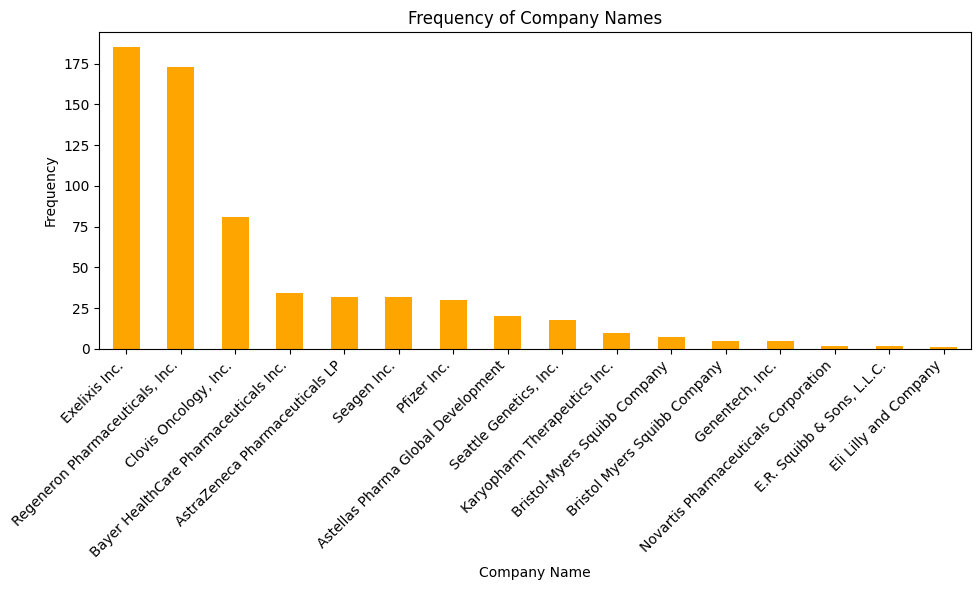

In [13]:
# Get the counts of each drug name
drug_counts = df['submitting_applicable_manufacturer_or_applicable_gpo_name'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
drug_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Company Names')
plt.xlabel('Company Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

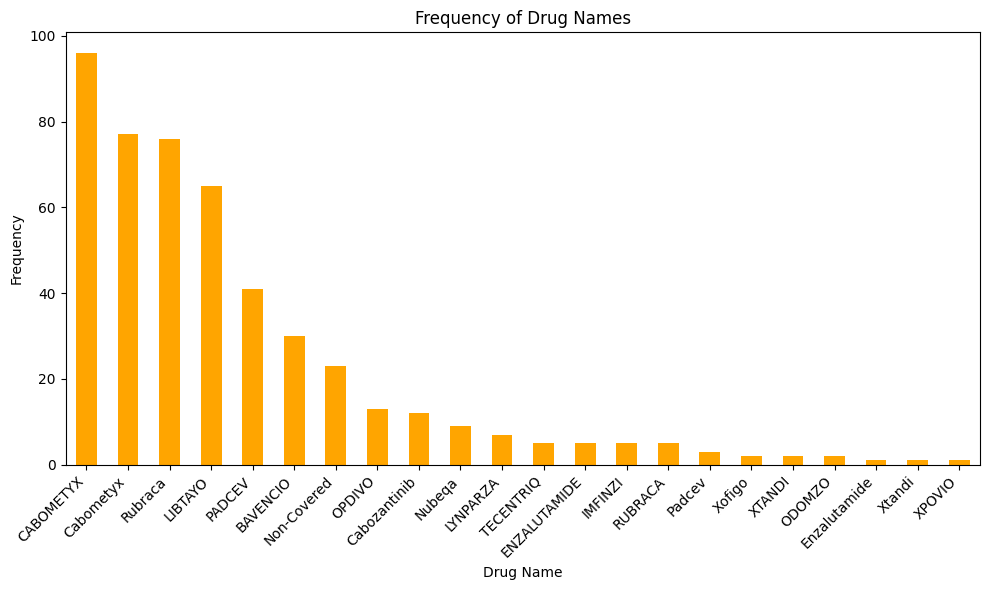

In [14]:
# Get the counts of each drug name
drug_counts = df['name_of_drug_or_biological_or_device_or_medical_supply_1'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
drug_counts.plot(kind='bar', color='orange')
plt.title('Frequency of Drug Names')
plt.xlabel('Drug Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [15]:
# Specify the drug name you are interested in
drug_name = 'Cabometyx'  #change drug name

# Filter the DataFrame for the specific drug
filtered_df = df[df['name_of_drug_or_biological_or_device_or_medical_supply_1'] == drug_name]

# Group by company name and sum the total payments
company_payments = filtered_df.groupby('submitting_applicable_manufacturer_or_applicable_gpo_name')['total_amount_of_payment_usdollars'].sum()

# Print the total payments for each company for the specific drug
print(company_payments)


submitting_applicable_manufacturer_or_applicable_gpo_name
Exelixis Inc.    583227.88
Name: total_amount_of_payment_usdollars, dtype: float64


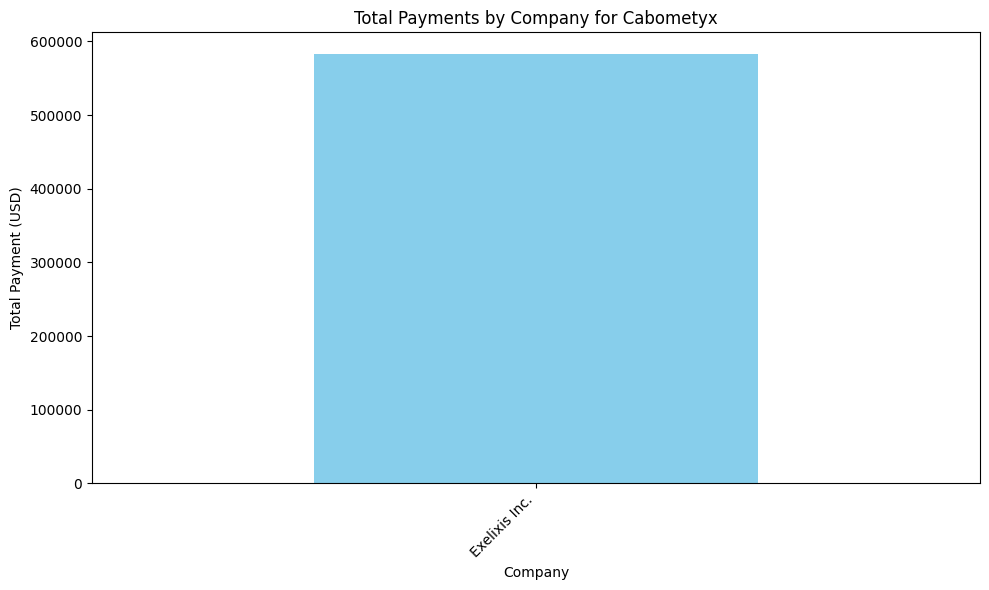

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
company_payments.plot(kind='bar', color='skyblue')
plt.title(f'Total Payments by Company for {drug_name}')
plt.xlabel('Company')
plt.ylabel('Total Payment (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [17]:
# Group by company name and sum the total payments
company_payments = df.groupby('submitting_applicable_manufacturer_or_applicable_gpo_name')['total_amount_of_payment_usdollars'].sum()

# Print the total payments for each company
print(company_payments)

submitting_applicable_manufacturer_or_applicable_gpo_name
Astellas Pharma Global Development        344933.58
AstraZeneca Pharmaceuticals LP           1731358.99
Bayer HealthCare Pharmaceuticals Inc.     239752.42
Bristol Myers Squibb Company               61110.90
Bristol-Myers Squibb Company               82636.45
Clovis Oncology, Inc.                     293284.76
E.R. Squibb & Sons, L.L.C.                  2657.13
Eli Lilly and Company                       9655.00
Exelixis Inc.                            1042675.12
Genentech, Inc.                            48174.72
Karyopharm Therapeutics Inc.               66255.95
Novartis Pharmaceuticals Corporation       70544.90
Pfizer Inc.                                93915.05
Regeneron Pharmaceuticals, Inc.          1703671.72
Seagen Inc.                                35855.95
Seattle Genetics, Inc.                    189928.52
Name: total_amount_of_payment_usdollars, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

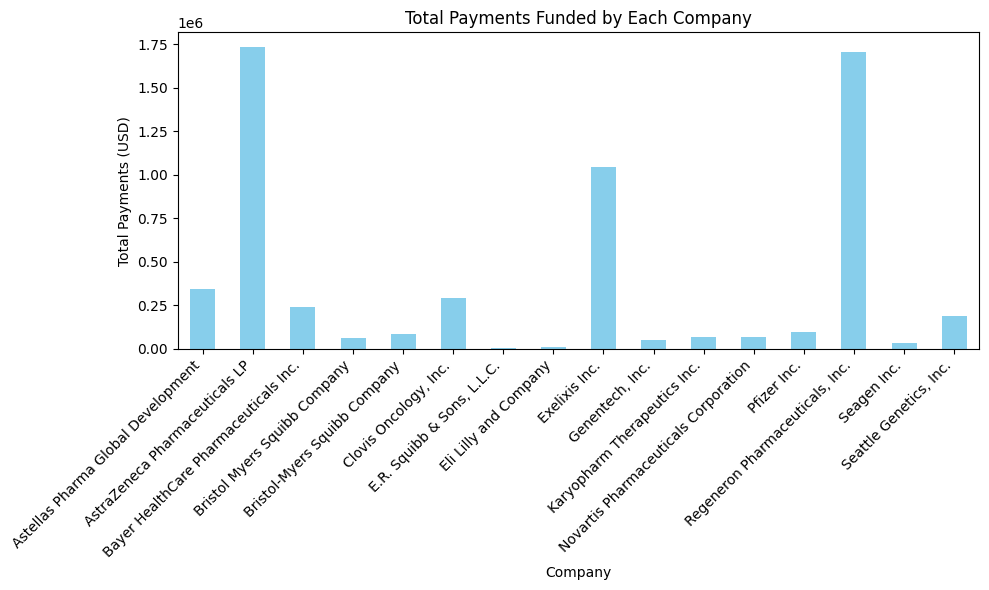

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
company_payments.plot(kind='bar', color='skyblue')
plt.title('Total Payments Funded by Each Company')
plt.xlabel('Company')
plt.ylabel('Total Payments (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

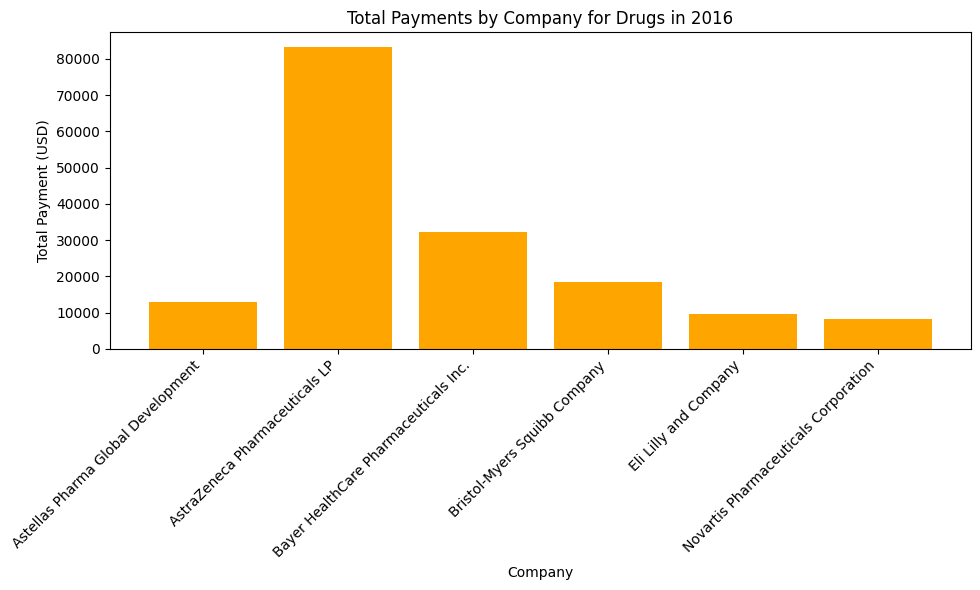

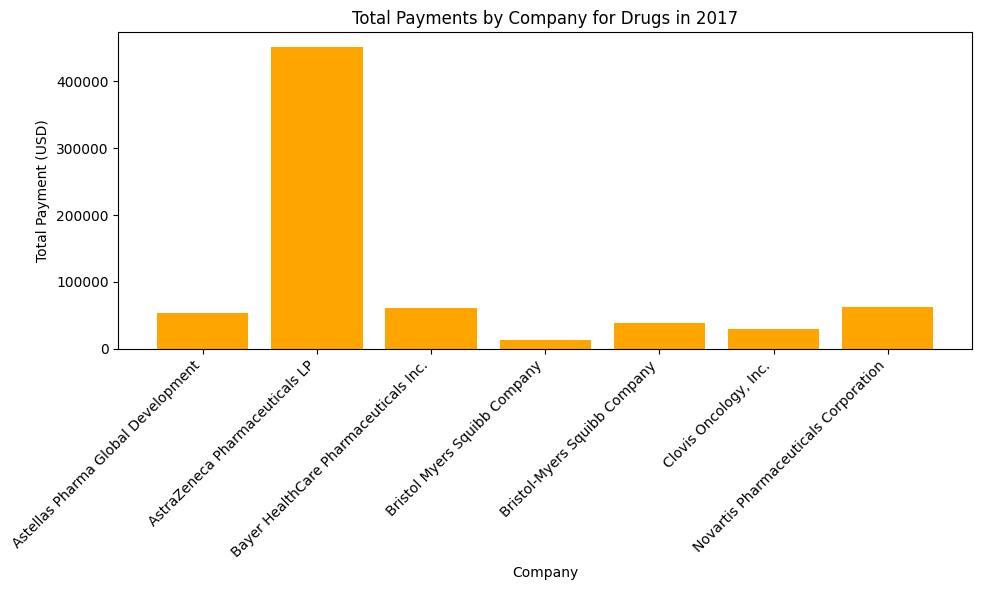

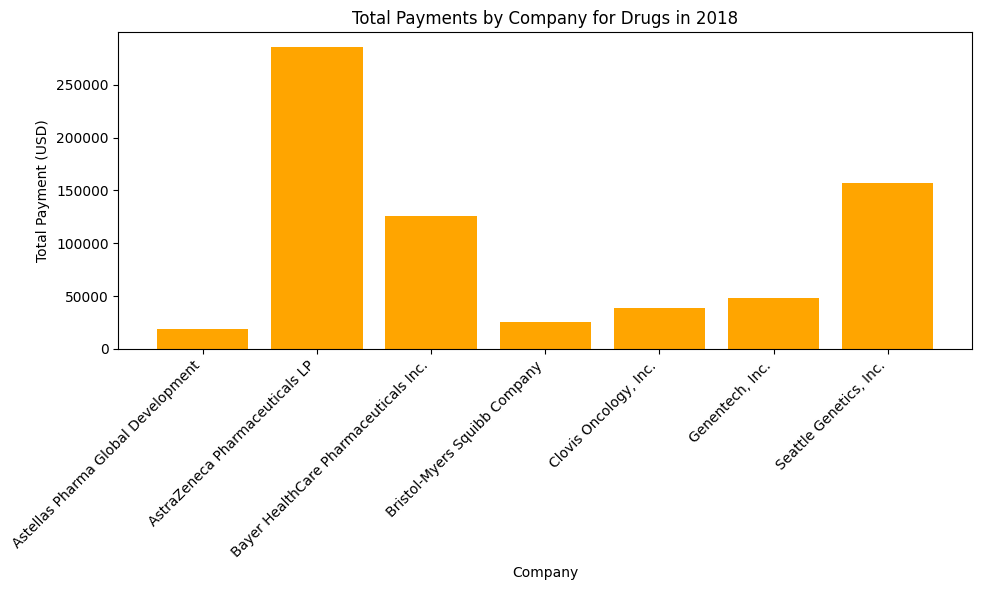

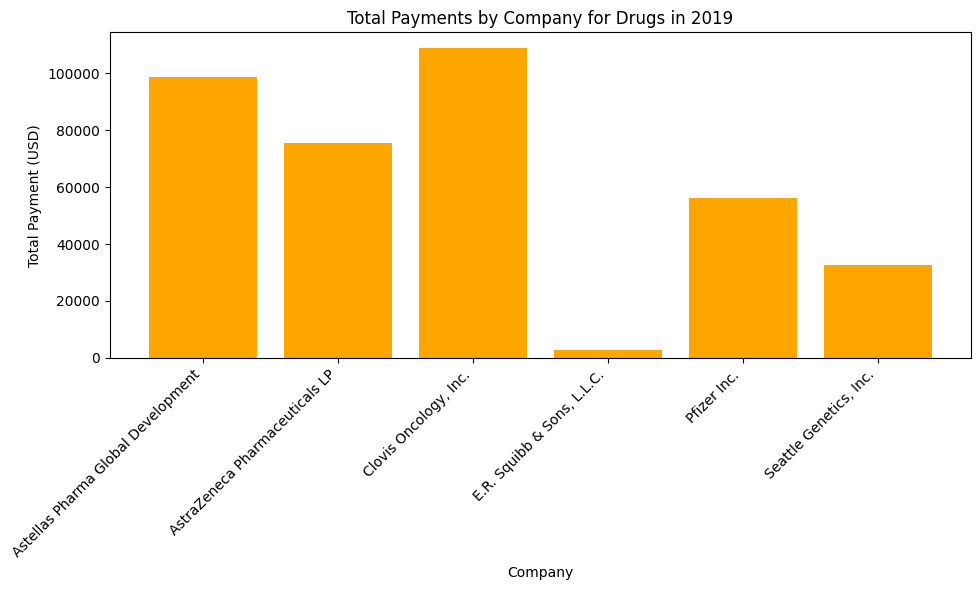

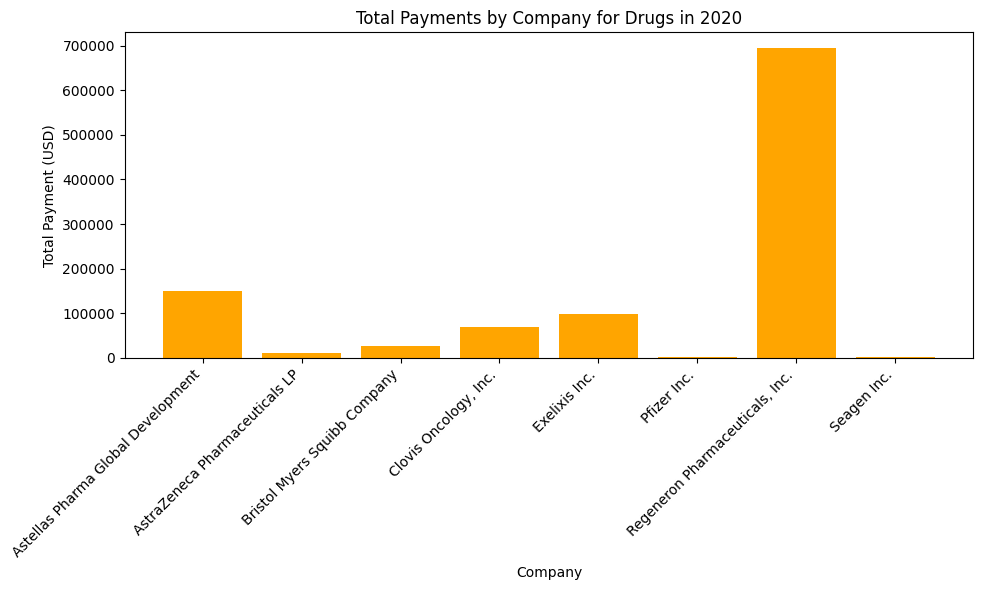

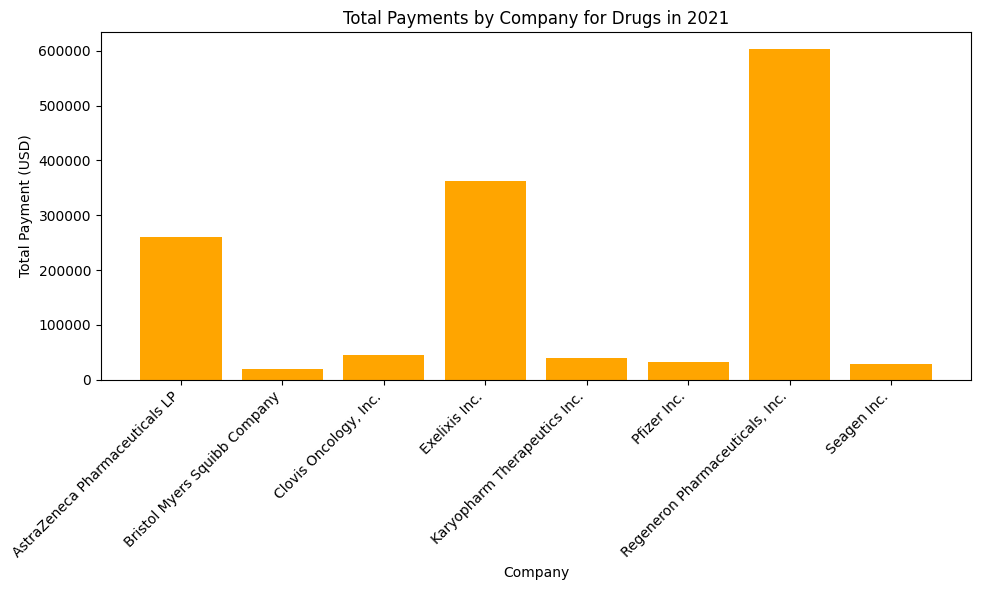

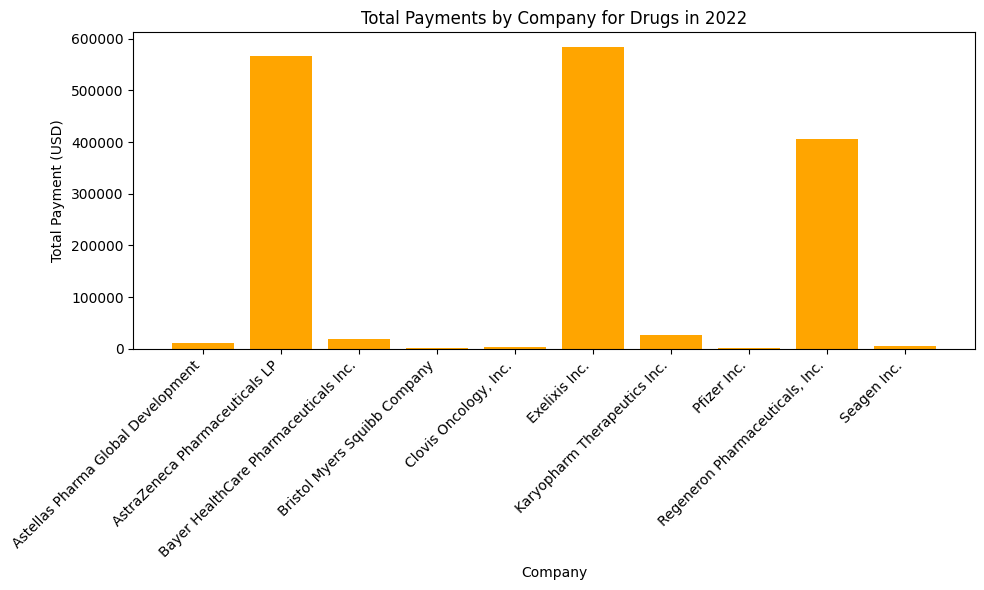

In [19]:
# Group by program year and company, sum the total payment
grouped_payments = data.groupby(['program_year', 'submitting_applicable_manufacturer_or_applicable_gpo_name'])['total_amount_of_payment_usdollars'].sum().reset_index()

# Plotting for each program year
for year in range(2016, 2023):
    # Filter the DataFrame for the current program year
    year_data = grouped_payments[grouped_payments['program_year'] == year]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(year_data['submitting_applicable_manufacturer_or_applicable_gpo_name'], year_data['total_amount_of_payment_usdollars'], color='orange')
    plt.title(f'Total Payments by Company for Drugs in {year}')
    plt.xlabel('Company')
    plt.ylabel('Total Payment (USD)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [20]:
grouped_payments #total payment of each company in a specific year

,program_year,submitting_applicable_manufacturer_or_applicable_gpo_name,total_amount_of_payment_usdollars
0,2016,Astellas Pharma Global Development,12883.80
1,2016,AstraZeneca Pharmaceuticals LP,83181.50
2,2016,Bayer HealthCare Pharmaceuticals Inc.,32370.60
3,2016,Bristol-Myers Squibb Company,18367.46
4,2016,Eli Lilly and Company,9655.00
5,2016,Novartis Pharmaceuticals Corporation,8165.50
6,2017,Astellas Pharma Global Development,54302.95
7,2017,AstraZeneca Pharmaceuticals LP,450636.75
8,2017,Bayer HealthCare Pharmaceuticals Inc.,61247.61
9,2017,Bristol Myers Squibb Company,13053.60


In [21]:
# from matplotlib import pyplot as plt
# _df_29.plot(kind='scatter', x='total_amount_of_payment_usdollars', y='program_year', s=32, alpha=.8)
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [22]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# _df_27.groupby('indicate_drug_or_biological_or_device_or_medical_supply_1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
# from matplotlib import pyplot as plt
# _df_26['program_year'].plot(kind='hist', bins=20, title='program_year')
# plt.gca().spines[['top', 'right',]].set_visible(False)